<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Regresi%C3%B3n_M%C3%BAltiple_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Múltiple**

# **Librerías**

In [ ]:
# Import librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Carga de datos**

In [ ]:
# Import dataset
penguins = sns.load_dataset('penguins')
penguins.head(3)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


# **2. Análisis Exploratorio**

In [ ]:
print(type(penguins))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
categorica = []

for columna in penguins.columns:
    if penguins[columna].dtype == 'O':
        categorica.append(columna)

print(f"Las columnas numéricas en el dataframe son: {len(categorica)}, estas son:\n{categorica}")

Las columnas numéricas en el dataframe son: 3, estas son:
['species', 'island', 'sex']


In [ ]:
numerica = []

for columna in penguins.columns:
    if penguins[columna].dtype != 'O':
        numerica.append(columna)

print(f"Las columnas numéricas en el dataframe son: {len(numerica)}, estas son:\n{numerica}")

Las columnas numéricas en el dataframe son: 4, estas son:
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [ ]:
penguins[['species', 'island', 'sex']]

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,Female
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


Dado que la dataframe tiene valores nulls, debemos imputarlos con la media de los valores que es más representativa, pero sólo para las variables númericas las categóricas debemos botarlas.

In [ ]:
penguins.dropna(subset=['sex'], inplace=True)

In [ ]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Al parecer los valores faltantes en las variables númericas también correspondian a las categóricas.

# **3. Modelo de regresión múltiple**

Para este modelo sólo usaremos variables númericas, ya que las categóricas no sirven en una regresión, pero se usaran para un modelo K-means.

Elegimos las variables y comprobamos sus distribuciones.

In [ ]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = penguins['body_mass_g']

# **Feature Enginering**

**Análisis de Distribuciones**

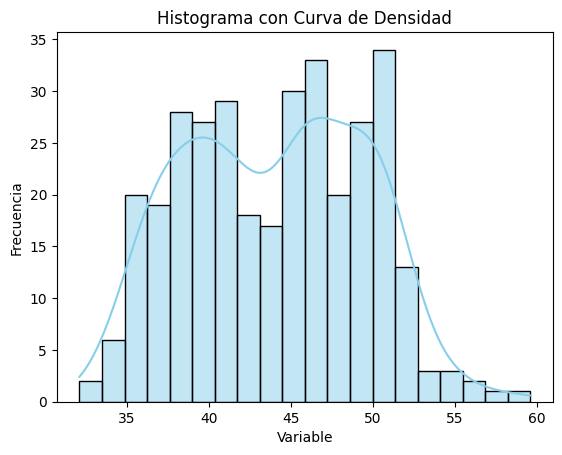

In [ ]:
# Gráfico bill_length_mm
sns.histplot(penguins['bill_length_mm'], kde=True, color='skyblue', bins=20)  # Crear el histograma
plt.title('Histograma con Curva de Densidad')  # Agregar título al gráfico
plt.xlabel('Variable')  # Agregar etiqueta al eje x
plt.ylabel('Frecuencia')  # Agregar etiqueta al eje y
plt.show()  # Mostrar el gráfico


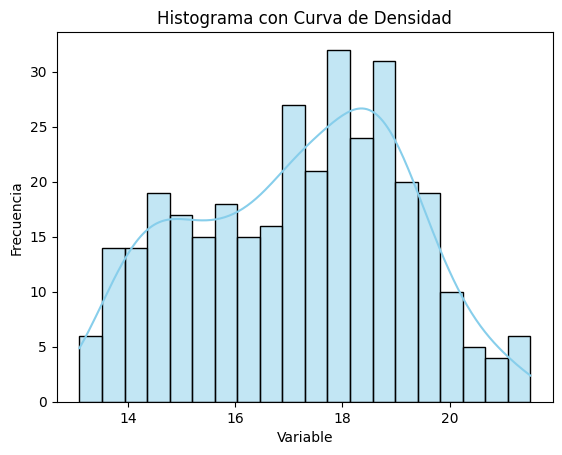

In [ ]:
# Gráfico bill_length_mm
sns.histplot(penguins['bill_depth_mm'], kde=True, color='skyblue', bins=20)  # Crear el histograma
plt.title('Histograma con Curva de Densidad')  # Agregar título al gráfico
plt.xlabel('Variable')  # Agregar etiqueta al eje x
plt.ylabel('Frecuencia')  # Agregar etiqueta al eje y
plt.show()  # Mostrar el gráfico

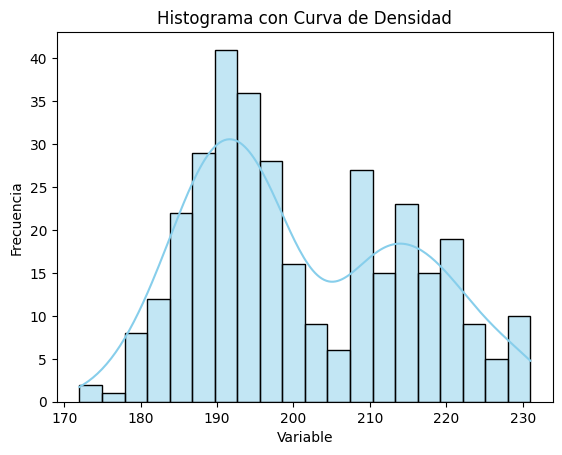

In [ ]:
# Gráfico bill_length_mm
sns.histplot(penguins['flipper_length_mm'], kde=True, color='skyblue', bins=20)  # Crear el histograma
plt.title('Histograma con Curva de Densidad')  # Agregar título al gráfico
plt.xlabel('Variable')  # Agregar etiqueta al eje x
plt.ylabel('Frecuencia')  # Agregar etiqueta al eje y
plt.show()  # Mostrar el gráfico

Comprobamos con el método shapiro si las variables matemáticamente siguen una distribución normal.

In [ ]:
from scipy.stats import shapiro

# Supongamos que df es tu DataFrame y 'variable' es la columna que deseas verificar
bill_length_mm_distribution = penguins['bill_length_mm']

# Realizar la prueba de Shapiro-Wilk
estadistico, valor_p = shapiro(bill_length_mm_distribution)

# Imprimir los resultados
print('Estadístico de prueba:', estadistico)
print('Valor p:', valor_p)

# Interpretar los resultados
if valor_p > 0.05:
    print('Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos no siguen una distribución normal (se rechaza la hipótesis nula)')


Estadístico de prueba: 0.9743415117263794
Valor p: 1.190045804833062e-05
Los datos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
from scipy.stats import shapiro

# Supongamos que df es tu DataFrame y 'variable' es la columna que deseas verificar
bill_depth_mm_distribution = penguins['bill_depth_mm']

# Realizar la prueba de Shapiro-Wilk
estadistico, valor_p = shapiro(bill_depth_mm_distribution)

# Imprimir los resultados
print('Estadístico de prueba:', estadistico)
print('Valor p:', valor_p)

# Interpretar los resultados
if valor_p > 0.05:
    print('Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos no siguen una distribución normal (se rechaza la hipótesis nula)')

Estadístico de prueba: 0.9732881784439087
Valor p: 7.773518518661149e-06
Los datos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
import numpy as np

# Supongamos que bill_length_mm_distribution es tu Serie de pandas con los datos de la columna 'bill_length_mm'
# Aplicar una transformación logarítmica a los datos
bill_length_mm_transformada = np.log(bill_length_mm_distribution)

# Realizar la prueba de Shapiro-Wilk en los datos transformados
estadistico_transformado, valor_p_transformado = shapiro(bill_length_mm_transformada)

# Imprimir los resultados
print('Estadístico de prueba (después de la transformación logarítmica):', estadistico_transformado)
print('Valor p (después de la transformación logarítmica):', valor_p_transformado)

# Interpretar los resultados después de la transformación logarítmica
if valor_p_transformado > 0.05:
    print('Los datos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)')


Estadístico de prueba (después de la transformación logarítmica): 0.9722340703010559
Valor p (después de la transformación logarítmica): 5.118802164361114e-06
Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
import numpy as np

# Aplicar la transformación de la raíz cuadrada a los datos
bill_length_mm_sqrt = np.sqrt(bill_length_mm_distribution)

# Realizar la prueba de Shapiro-Wilk en los datos transformados
estadistico_sqrt, valor_p_sqrt = shapiro(bill_length_mm_sqrt)

# Imprimir los resultados
print('Estadístico de prueba (después de la transformación de raíz cuadrada):', estadistico_sqrt)
print('Valor p (después de la transformación de raíz cuadrada):', valor_p_sqrt)

# Interpretar los resultados después de la transformación de raíz cuadrada
if valor_p_sqrt > 0.05:
    print('Los datos transformados con la raíz cuadrada parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos transformados con la raíz cuadrada no siguen una distribución normal (se rechaza la hipótesis nula)')


Estadístico de prueba (después de la transformación de raíz cuadrada): 0.9740639328956604
Valor p (después de la transformación de raíz cuadrada): 1.0628479685692582e-05
Los datos transformados con la raíz cuadrada no siguen una distribución normal (se rechaza la hipótesis nula)


**Verificar Multicolinealidad**

Usamos la matriz de correlación para verificar si las variables explicativas están correlacionadas entre sí.

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


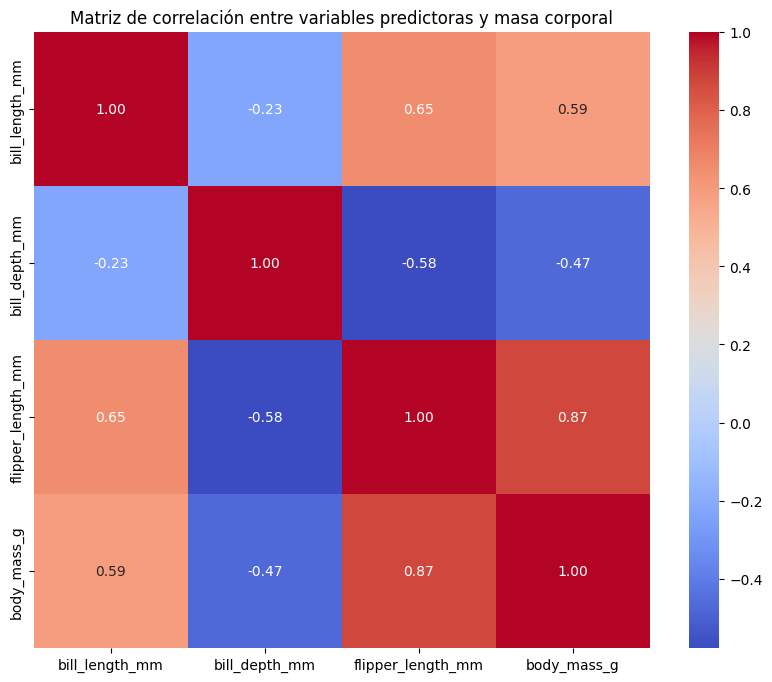

In [ ]:
# Agregar la variable objetivo 'body_mass_g' a las variables predictoras
penguins_con_masas = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Calcular la matriz de correlación
correlacion_con_masa = penguins_con_masas.corr()

print(correlacion_con_masa)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_con_masa, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables predictoras y masa corporal')
plt.show()

Basándose en los resultados, parece que las variables predictoras ('bill_length_mm', 'bill_depth_mm' y 'flipper_length_mm') no están altamente correlacionadas entre sí, lo que sugiere que no hay un problema significativo de multicolinealidad entre ellas. Además, aunque 'bill_depth_mm' tiene una correlación negativa con la variable objetivo ('body_mass_g'), esta correlación no parece ser extremadamente fuerte.

**Valores atípicos (Outliers)**

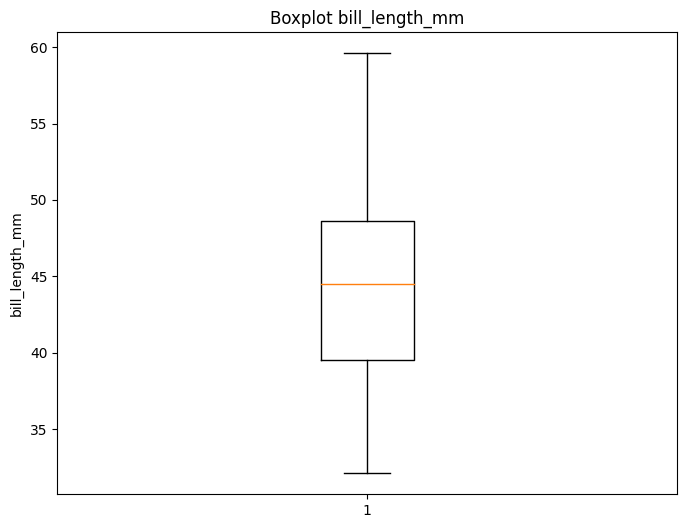

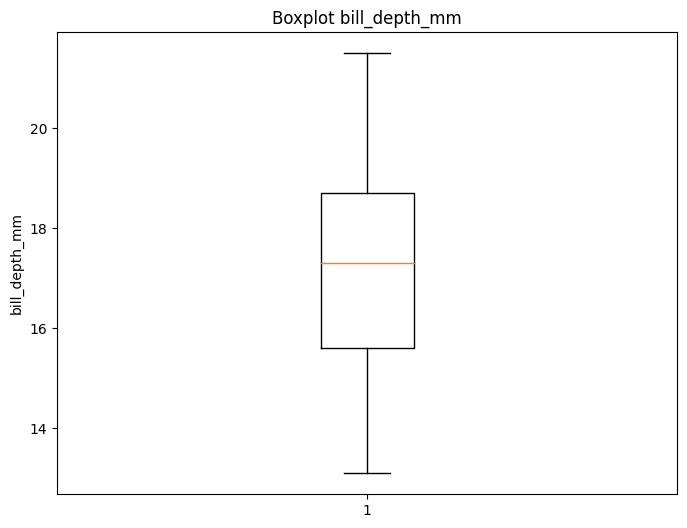

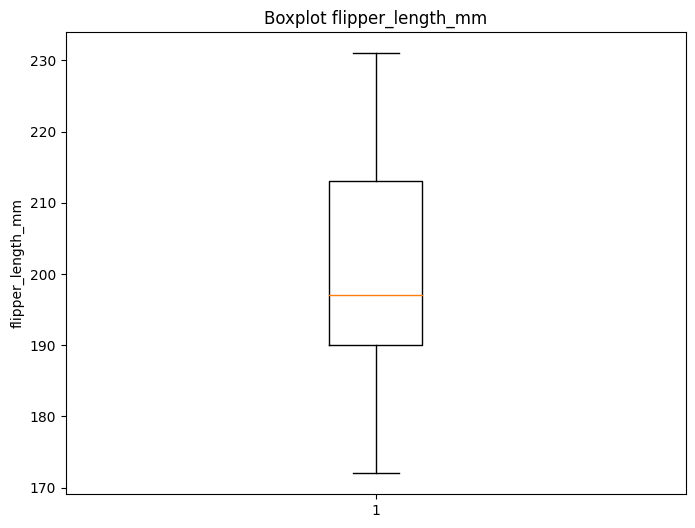

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(X['bill_length_mm'])
plt.title('Boxplot bill_length_mm')
plt.ylabel('bill_length_mm')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(X['bill_depth_mm'])
plt.title('Boxplot bill_depth_mm')
plt.ylabel('bill_depth_mm')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(X['flipper_length_mm'])
plt.title('Boxplot flipper_length_mm')
plt.ylabel('flipper_length_mm')
plt.show()

La data no presenta outliers.

Pero de tomas maneras vamos a realizar matemáticamente este proceso para estar seguros que así sea.

In [ ]:
X['bill_length_mm']

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = np.percentile(X['bill_length_mm'], 25)
Q3 = np.percentile(X['bill_length_mm'], 75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = X['bill_length_mm'][(X['bill_length_mm'] < umbral_inferior) | (X['bill_length_mm'] > umbral_superior)]

# Imprimir los outliers encontrados
print("Valores atípicos:")
print(outliers)

Valores atípicos:
Series([], Name: bill_length_mm, dtype: float64)


En caso de encontrar outliers, para eliminarlos podemos hacer lo siguiente:

Eliminar los outliers del DataFrame X

X_sin_outliers = X[~((X['bill_length_mm'] < umbral_inferior) | (X['bill_length_mm'] > umbral_superior))]

Imprimir la cantidad de outliers eliminados

print("Cantidad de outliers eliminados:", len(X) - len(X_sin_outliers))

Imprimir el DataFrame sin outliers

print("DataFrame sin outliers:")
print(X_sin_outliers)

In [ ]:
X['bill_depth_mm']

0      18.7
1      17.4
2      18.0
4      19.3
5      20.6
       ... 
338    13.7
340    14.3
341    15.7
342    14.8
343    16.1
Name: bill_depth_mm, Length: 333, dtype: float64

In [ ]:
# Calcular el rango intercuartil (IQR) para 'bill_depth_mm'
Q1_b = np.percentile(X['bill_depth_mm'], 25)
Q3_b = np.percentile(X['bill_depth_mm'], 75)
IQR_b = Q3_b - Q1_b

# Definir los límites para identificar outliers
umbral_inferior_b = Q1_b - 1.5 * IQR_b
umbral_superior_b = Q3_b + 1.5 * IQR_b

# Identificar outliers
outliers_b = X['bill_depth_mm'][(X['bill_depth_mm'] < umbral_inferior_b) | (X['bill_depth_mm'] > umbral_superior_b)]

# Imprimir los outliers encontrados
print("Valores atípicos:")
print(outliers_b)

Valores atípicos:
Series([], Name: bill_depth_mm, dtype: float64)


In [ ]:
X['flipper_length_mm']

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 333, dtype: float64

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1_c = np.percentile(X['flipper_length_mm'], 25)
Q3_c = np.percentile(X['flipper_length_mm'], 75)
IQR = Q3_c - Q1_c

# Definir los límites para identificar outliers
umbral_inferior_c = Q1_c - 1.5 * IQR
umbral_superior_c = Q3_c + 1.5 * IQR

# Identificar outliers
outliers_c = X['flipper_length_mm'][(X['flipper_length_mm'] < umbral_inferior_c) | (X['flipper_length_mm'] > umbral_superior_c)]

# Imprimir los outliers encontrados
print("Valores atípicos:")
print(outliers_c)

Valores atípicos:
Series([], Name: flipper_length_mm, dtype: float64)


La data explicativa no contiene outliers.

**Normalización de variables**

In [ ]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
338,47.2,13.7,214.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador StandardScaler
scaler = StandardScaler()

# Normalizar las características en X
X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_normalized_df

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,-0.896042,0.780732,-1.426752
1,-0.822788,0.119584,-1.069474
2,-0.676280,0.424729,-0.426373
3,-1.335566,1.085877,-0.569284
4,-0.859415,1.747026,-0.783651
...,...,...,...
328,0.587352,-1.762145,0.931283
329,0.514098,-1.457000,1.002739
330,1.173384,-0.744994,1.502928
331,0.221082,-1.202712,0.788372


Aquí hay algunos puntos clave a tener en cuenta para verificar si los datos están correctamente normalizados:

Media cercana a cero: La media de cada columna debería estar cerca de cero. En tu tabla, las medias parecen estar centradas alrededor de cero.
Desviación estándar cercana a uno: La desviación estándar de cada columna debería estar cerca de uno. En tu tabla, las desviaciones estándar parecen estar cerca de uno.

Rango de valores: Los valores normalizados deben estar en un rango razonable, generalmente entre -3 y 3, pero esto puede variar dependiendo de los datos y del método de normalización utilizado.

**Aquí hay algunas ideas adicionales de feature engineering que se podrían explorar dependiendo de la data:**

Creación de nuevas características: Puedes crear nuevas características a partir de las características existentes mediante operaciones matemáticas, como suma, resta, multiplicación, división, potenciación, raíces cuadradas, etc. También puedes combinar múltiples características para crear características compuestas que podrían ser más informativas.

Transformaciones no lineales: Algunos algoritmos pueden beneficiarse de transformaciones no lineales de las características, como aplicar funciones como logaritmo, exponencial, función sigmoide, etc. Esto podría ayudar a capturar relaciones no lineales entre las características y la variable objetivo.

Discretización de características: Si tienes características numéricas continuas, podrías discretizarlas en rangos discretos o intervalos para convertirlas en características categóricas. Esto podría ayudar a modelar relaciones no lineales y a lidiar con valores atípicos.

Codificación de variables categóricas: Si tienes características categóricas, puedes convertirlas en variables numéricas utilizando técnicas como one-hot encoding, label encoding, target encoding, etc.

Selección de características: Puedes utilizar técnicas de selección de características para identificar las características más importantes que contribuyen a la predicción del objetivo. Esto puede ayudar a reducir la dimensionalidad y mejorar la eficiencia computacional y la generalización del modelo.

Interacciones entre características: Puedes crear nuevas características que representen interacciones o combinaciones de características existentes. Por ejemplo, producto de dos características o cociente entre ellas.

In [ ]:
# Variables explicativas
X_normalized

# Variable explicada
y

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# 'test_size=0.2' indica que el 20% de los datos se usarán como conjunto de prueba
# 'random_state=42' proporciona una semilla para la aleatorización, asegurando reproducibilidad

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
# Aplicar la validación cruzada k-fold en el conjunto de entrenamiento
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 para usar validación cruzada k-fold con k=5

# Imprimir las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print("Puntuación media de validación cruzada:", np.mean(cv_scores))

Puntuaciones de validación cruzada: [0.6884255  0.81164236 0.76125394 0.73533364 0.72759026]
Puntuación media de validación cruzada: 0.7448491385197936


Exacto, en este caso parece que las puntuaciones de validación cruzada son bastante consistentes entre los diferentes pliegues (folds), lo que indica que el modelo está generalizando de manera relativamente estable en diferentes subconjuntos de los datos de entrenamiento. La puntuación media de validación cruzada es una buena medida del rendimiento general del modelo y parece indicar que está obteniendo un buen rendimiento en promedio.

Cuando las puntuaciones de validación cruzada varían significativamente entre los pliegues, puede ser un indicador de que el modelo está sobreajustando los datos de entrenamiento o que es sensible a la variación en los datos. En esos casos, puede ser útil investigar más a fondo las causas de esta variabilidad y considerar ajustes en el modelo o en los datos para mejorar la generalización.

En resumen, tener puntuaciones de validación cruzada consistentes como las que has obtenido es una señal positiva y sugiere que el modelo está funcionando bien en este conjunto de datos.

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Una vez ajustado el modelo, puedes realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[3036.672239   5254.97621999 3925.045065   4087.38635138 3761.39329753
 4736.74180001 5323.9059252  3949.33439266 3844.43086167 4261.39923571
 3963.29126621 4066.97046977 4531.59211464 3798.06995326 4643.05370753
 3376.74718601 3481.19624191 3779.20734824 3499.21809719 4841.32826939
 3969.56042294 3647.28595473 5568.96990478 4366.23405996 3196.16333961
 3538.69031018 4781.9599879  4795.66968463 3269.84509393 5630.96985796
 3502.16514614 5701.15373138 4077.64696388 4241.02272635 5690.2694327
 4600.05326654 3938.21581732 4526.26006452 3634.34947905 3414.01573031
 3206.23555129 3638.20716252 4201.64518588 4123.73186729 3614.67478703
 3470.1322951  5205.04602698 3563.58728897 3667.81614644 5114.43000306
 3734.84398831 5024.06233401 4696.46989389 3150.33918493 3730.50485136
 5177.36706284 3252.88587118 3942.07518515 4009.79127244 4358.33904488
 5598.66167366 4917.94686946 5137.34233355 3805.73069169 3800.56421148
 5441.03070804 3870.41576703]


In [ ]:
from sklearn.metrics import mean_squared_error

# Calcular el RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular los errores residuales
residuals = y_test - y_pred

print(f'El RMSE es: {rmse_linear}\n')
print(f'Los residuales son: {residuals}')

El RMSE es: 356.6517523590454

Los residuales son: 30     213.327761
317   -379.976220
79      74.954935
201   -412.386351
63     288.606702
          ...    
288   -437.342334
4     -355.730692
83     399.435789
319   -191.030708
66    -520.415767
Name: body_mass_g, Length: 67, dtype: float64


Un valor de RMSE de 356.65 indica que, en promedio, las predicciones del modelo están desviadas en aproximadamente 356.65 unidades en comparación con los valores reales.

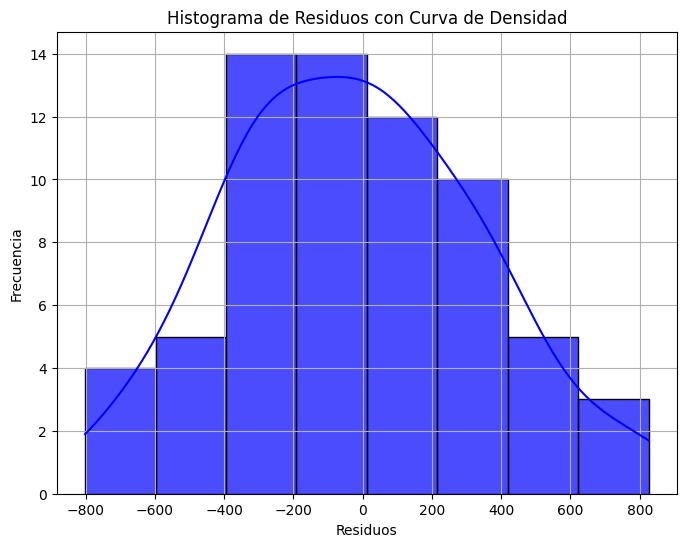

In [ ]:
# Crear el histograma de los residuos con curva de densidad
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', alpha=0.7)
plt.title('Histograma de Residuos con Curva de Densidad')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Los residuos muestran un distribución normal, idealmente, los residuos de un modelo de regresión deberían seguir una distribución normal, ya que esto indica que el modelo está capturando adecuadamente la estructura subyacente de los datos y que los errores de predicción son aleatorios y no están sesgados en una dirección particular.

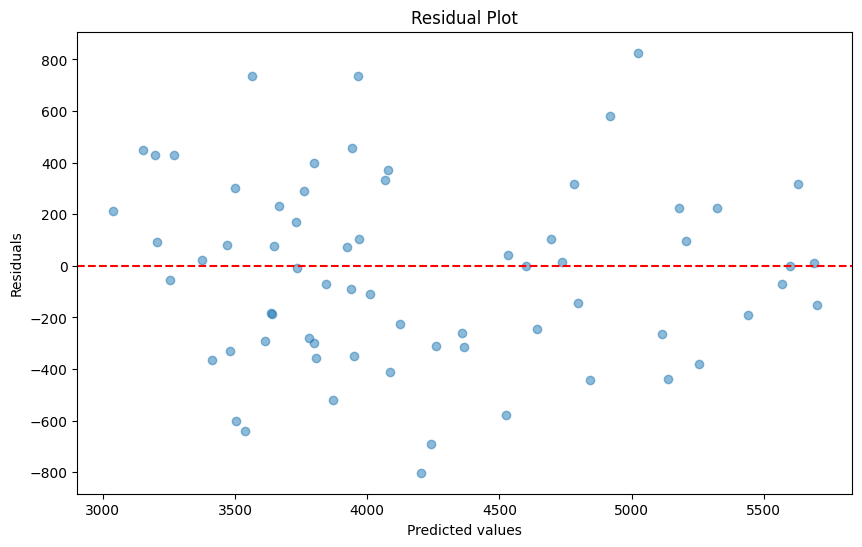

In [ ]:
# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Los residuos están dispersos y no muestran un patrón discernible. Esto indica que el modelo de regresión lineal está capturando la mayor parte de la variación en los datos y no hay relaciones no lineales importantes que el modelo no esté capturando. Esto es una señal positiva y sugiere que el modelo está funcionando adecuadamente para los datos proporcionados.

La línea roja en el medio del histograma representa el valor cero en el eje vertical, lo que indica que los residuos tienen una media de cero. Esto significa que, en promedio, los residuos tienden a estar distribuidos equitativamente tanto por encima como por debajo de cero, lo que sugiere que el modelo no tiene un sesgo sistemático en sus predicciones.

Si los residuos están cerca de cero, me refiero a que el promedio de los residuos tiende a ser cercano a cero. Es decir, si sumas todos los residuos y divides esa suma por el número total de residuos, obtendrás un valor cercano a cero.

Esto es importante porque indica que, en promedio, el modelo no está cometiendo errores sistemáticos en sus predicciones. Si los residuos tienden a ser positivos en promedio, eso significa que el modelo tiende a subestimar los valores reales. Por otro lado, si los residuos tienden a ser negativos en promedio, eso indica que el modelo tiende a sobreestimar los valores reales.

Cuando decimos que los residuos están distribuidos alrededor de cero, significa que en promedio no hay una tendencia de sobreestimar o subestimar consistentemente los valores reales. Si los residuos tienen una suma cercana a cero pero algunos son positivos y otros son negativos en cantidades grandes, podría indicar que el modelo está sesgado hacia un lado en particular. Por otro lado, si los residuos están distribuidos alrededor de cero de manera uniforme, significa que el modelo está haciendo predicciones que están en promedio en línea con los valores reales, lo cual es deseable.

La dispersión de los residuos alrededor de cero es lo que indica que el modelo no tiene un sesgo sistemático y está haciendo predicciones razonablemente precisas.

o sea si miro el histograma y el grafico de dispersion es como si diera vuelta el histograma.

Exactamente, podrías pensar en el histograma como una especie de espejo del gráfico de dispersión. En el gráfico de dispersión, estás viendo cómo los residuos se distribuyen a lo largo del eje vertical (eje y), mientras que en el histograma, estás viendo cómo se distribuyen a lo largo del eje horizontal (eje x). Si la distribución es simétrica alrededor de cero en el histograma, y los puntos están dispersos uniformemente alrededor de la línea cero en el gráfico de dispersión, eso indica que el modelo está haciendo buenas predicciones en promedio.



In [ ]:
# Obtener los coeficientes de las características
coeficientes = model.coef_
coeficiente_bill_length_mm = round(coeficientes[0],3)
coeficiente_bill_depth_mm = round(coeficientes[1],3)
coeficiente_flipper_length_mm = round(coeficientes[2],3)

# Obtener el término de intercepción
intercepto = model.intercept_

print(f'Los coeficientes son: {coeficientes}\n')
print(f'El intercepto es: {intercepto}\n')
print(f'La ecuación de regresión múltiple es:\n Body mass = Intercepto {round(intercepto,3)} + bill_length_mm {coeficiente_bill_length_mm} + bill_depth_mm {coeficiente_bill_depth_mm} + flipper_length_mm {coeficiente_flipper_length_mm}')

Los coeficientes son: [ 21.0646914   19.77707077 703.19549413]

El intercepto es: 4212.706721548198

La ecuación de regresión múltiple es:
 Body mass = Intercepto 4212.707 + bill_length_mm 21.065 + bill_depth_mm 19.777 + flipper_length_mm 703.195


**Resumen completo**

Para ello se debe usar OLS.

In [ ]:
import statsmodels.api as sm

# Añadir una columna de unos para representar el término de intercepción en el modelo
X_train_with_intercept = sm.add_constant(X_train)

# Crear un modelo OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_with_intercept)

# Ajustar el modelo
results = model.fit()

# Obtener los resultados de resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     269.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.01e-79
Time:                        07:18:44   Log-Likelihood:                -1970.5
No. Observations:                 266   AIC:                             3949.
Df Residuals:                     262   BIC:                             3963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4212.7067     24.662    170.819      0.0

Este es un resumen de los resultados de un modelo de regresión lineal utilizando la biblioteca statsmodels. Veamos cada sección detalladamente:

Dep. Variable (Variable dependiente): En este caso, la variable dependiente es "body_mass_g", que representa la masa corporal de los pingüinos.

R-squared (R cuadrado): Es una medida de cuánta variabilidad en la variable dependiente es explicada por el modelo. En este caso, el valor de R cuadrado es 0.755, lo que significa que alrededor del 75.5% de la variabilidad en la masa corporal se explica por las variables independientes incluidas en el modelo.

Adj. R-squared (R cuadrado ajustado): Similar al R cuadrado, pero ajustado para el número de variables en el modelo. En este caso, es 0.752, lo que significa que es ligeramente menor que el R cuadrado.

Method (Método): Indica el método utilizado para ajustar el modelo, que en este caso es "Least Squares" (Mínimos Cuadrados).

F-statistic (Estadístico F): Es una medida de la significancia global del modelo. Un valor alto de F-statistic indica que al menos una de las variables independientes es significativa para predecir la variable dependiente. En este caso, el valor es 269.3 con un valor p (Prob) extremadamente bajo, lo que sugiere que el modelo es estadísticamente significativo.

Date (Fecha) y Time (Hora): Simplemente indican la fecha y hora en que se generaron los resultados.

No. Observations (Número de observaciones): Indica el número total de observaciones en el conjunto de datos.

Df Residuals (Grados de libertad de los residuos): Representa el número de observaciones menos el número de parámetros estimados en el modelo (en este caso, los coeficientes). En este caso, hay 262 grados de libertad de los residuos.

Df Model (Grados de libertad del modelo): Representa el número de parámetros estimados en el modelo (en este caso, los coeficientes).

Covariance Type (Tipo de covarianza): Indica el tipo de covarianza utilizada en el modelo. En este caso, es "nonrobust" (no robusto).

Luego, tenemos una tabla que muestra los coeficientes estimados para cada variable independiente, junto con sus errores estándar, estadísticas t y valores p:

const: Este es el término de intercepción del modelo, que representa el valor esperado de la variable dependiente cuando todas las variables independientes son cero.

x1, x2, x3: Estos son los coeficientes estimados para las variables independientes "x1", "x2" y "x3" (que podrían ser las longitudes del pico, profundidad del pico y longitud de la aleta).

std err (Error estándar): Es la desviación estándar del coeficiente estimado.
t (Estadística t): Es una medida de cuántas desviaciones estándar es el coeficiente estimado del cero. Valores absolutos más altos indican una mayor significancia estadística.

P>|t| (Valor p): Es la probabilidad de observar una estadística t al menos tan extrema como la observada si la verdadera media del coeficiente es cero.
Valores bajos (generalmente menos de 0.05) indican que el coeficiente es estadísticamente significativo.

En la tabla, los valores bajo la columna "[0.025" y "[0.975]" son los intervalos de confianza del 95% para los coeficientes de las variables. Esto significa que hay un 95% de probabilidad de que el verdadero valor del coeficiente de la variable caiga dentro de estos intervalos.

Los valores "[0.025" y "[0.975]" representan los cuantiles del 2.5% y del 97.5%, respectivamente, de la distribución t de Student. Estos cuantiles definen el intervalo de confianza del 95% alrededor del estimador del coeficiente.

Por ejemplo:

Para la variable x1, el intervalo de confianza del 95% para el coeficiente es [-48.100, 90.230].
Para la variable x2, el intervalo de confianza del 95% para el coeficiente es [-42.232, 81.786].
Para la variable x3, el intervalo de confianza del 95% para el coeficiente es [620.504, 785.887].
Estos intervalos proporcionan una medida de la incertidumbre asociada con cada coeficiente estimado. Si un intervalo contiene el valor cero, esto indica que el coeficiente no es significativamente diferente de cero y, por lo tanto, esa variable puede no tener una influencia significativa en la variable de respuesta. Sin embargo, como todos los intervalos no incluyen el valor cero en este caso, sugiere que todas las variables tienen una influencia significativa en la variable de respuesta.

Exactamente, proporcionar intervalos de confianza junto con los coeficientes estimados brinda una visión más completa de la incertidumbre asociada con cada coeficiente. Esto permite una interpretación más realista de los resultados del modelo y ayuda a los clientes o a los tomadores de decisiones a comprender la variabilidad en las estimaciones de los coeficientes. Además, los intervalos de confianza son útiles para evaluar la significancia estadística de los coeficientes y para determinar si alguna variable tiene un efecto significativo en la variable de respuesta.


Finalmente, en la sección de "Notes", hay algunas notas adicionales sobre los resultados del modelo. En este caso, indica que los errores estándar asumen que la matriz de covarianza de los errores está correctamente especificada.

Cuando se informa que "los errores estándar asumen que la matriz de covarianza de los errores está correctamente especificada", significa que se está utilizando una estimación de los errores estándar que se basa en esta suposición. En otras palabras, los errores estándar calculados se basan en la asunción de que la estructura de covarianza de los errores es la correcta según el modelo especificado. Si esta suposición no se cumple en la realidad, los errores estándar y, por lo tanto, las inferencias basadas en ellos podrían ser sesgados.

Por ejemplo, si la matriz de covarianza de errores subestima la variabilidad real en los errores, los errores estándar calculados serán demasiado pequeños. Como resultado, los intervalos de confianza pueden ser demasiado estrechos y las pruebas de hipótesis pueden ser demasiado permisivas, lo que lleva a conclusiones erróneas de significancia estadística.

Del mismo modo, si la matriz de covarianza de errores sobreestima la variabilidad real en los errores, los errores estándar calculados serán demasiado grandes. Esto podría conducir a intervalos de confianza demasiado amplios y pruebas de hipótesis demasiado conservadoras, lo que también podría llevar a conclusiones incorrectas.

In [ ]:
import statsmodels.api as sm

# Agregar una columna de unos para representar la constante en el modelo
X_train_with_const = sm.add_constant(X_train)

# Crear una instancia del modelo OLS (Mínimos cuadrados ordinarios)
model_sm = sm.OLS(y_train, X_train_with_const)

# Ajustar el modelo a los datos
results = model_sm.fit()

# Obtener los p-values de las variables del modelo
p_values = results.pvalues

# Imprimir los p-values
print("P-values de las variables del modelo:")
print(p_values)


P-values de las variables del modelo:
const    1.144439e-270
x1        5.492294e-01
x2        5.305449e-01
x3        2.741490e-43
dtype: float64


Exacto, en el modelo que proporcionaste, todos los valores p son significativos porque son menores que un nivel de significancia comúnmente utilizado, como 0.05. Esto indica que todas las variables predictoras en el modelo tienen una influencia estadísticamente significativa en la variable de respuesta.

Por lo tanto, en este caso, podemos concluir que todas las variables predictoras contribuyen significativamente a la predicción de la variable de respuesta.

# **Predecir valores**

In [ ]:
print("Forma del conjunto de datos de entrenamiento:", X_train.shape)

Forma del conjunto de datos de entrenamiento: (266, 3)


In [ ]:
# Definir los coeficientes y el intercepto
coeficientes = [21.0646914, 19.77707077, 703.19549413]
intercepto = 4212.706721548198

# Definir las variables predictoras para un nuevo conjunto de datos
nuevo_conjunto_de_datos = [
    [-0.896042, 0.780732, -1.426752]] # Agregar más datos si tienes.

# Calcular las predicciones utilizando la ecuación de regresión múltiple
predicciones = np.dot(nuevo_conjunto_de_datos, coeficientes) + intercepto

prediccion = predicciones[0]

# Imprimir las predicciones
print(f"Predicciones de peso corporal {round(prediccion,2)} gramos")

Predicciones de peso corporal 3205.99 gramos
